<a href="https://colab.research.google.com/github/adsuman7/ecommerce/blob/master/covid19icu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt
import seaborn as sns



Mounted at /content/drive


In [18]:
df=pd.read_csv(r'/content/drive/My Drive/covid/covid.csv')

# df.head()
# df.describe()


In [16]:
# contact_other_covid
round(pd.crosstab(df['covid_res'], df['contact_other_covid'], normalize = True).apply(lambda x: x * 100), 3)

contact_other_covid,1,2,99
covid_res,,,
1,13.110,11.534,14.300
2,21.653,14.772,12.822
3,4.395,3.645,3.769


Pecentages:



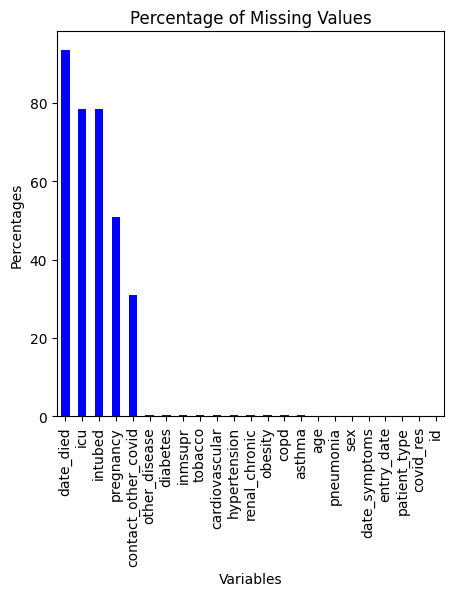

In [11]:
print("Pecentages:\n")
# print(((df.isin([97, 98, 99, '9999-99-99']).sum()/df.shape[0] * 100).round(3)).sort_values(ascending = False) )

percentages = ((df.isin([97, 98, 99, '9999-99-99']).sum()/df.shape[0] * 100).round(3)).sort_values(ascending = False)
ax = percentages.plot(kind='bar', color='blue', figsize=(5,5))
ax.set_xlabel("Variables")
ax.set_ylabel("Percentages")
ax.set_title("Percentage of Missing Values")
plt.show()

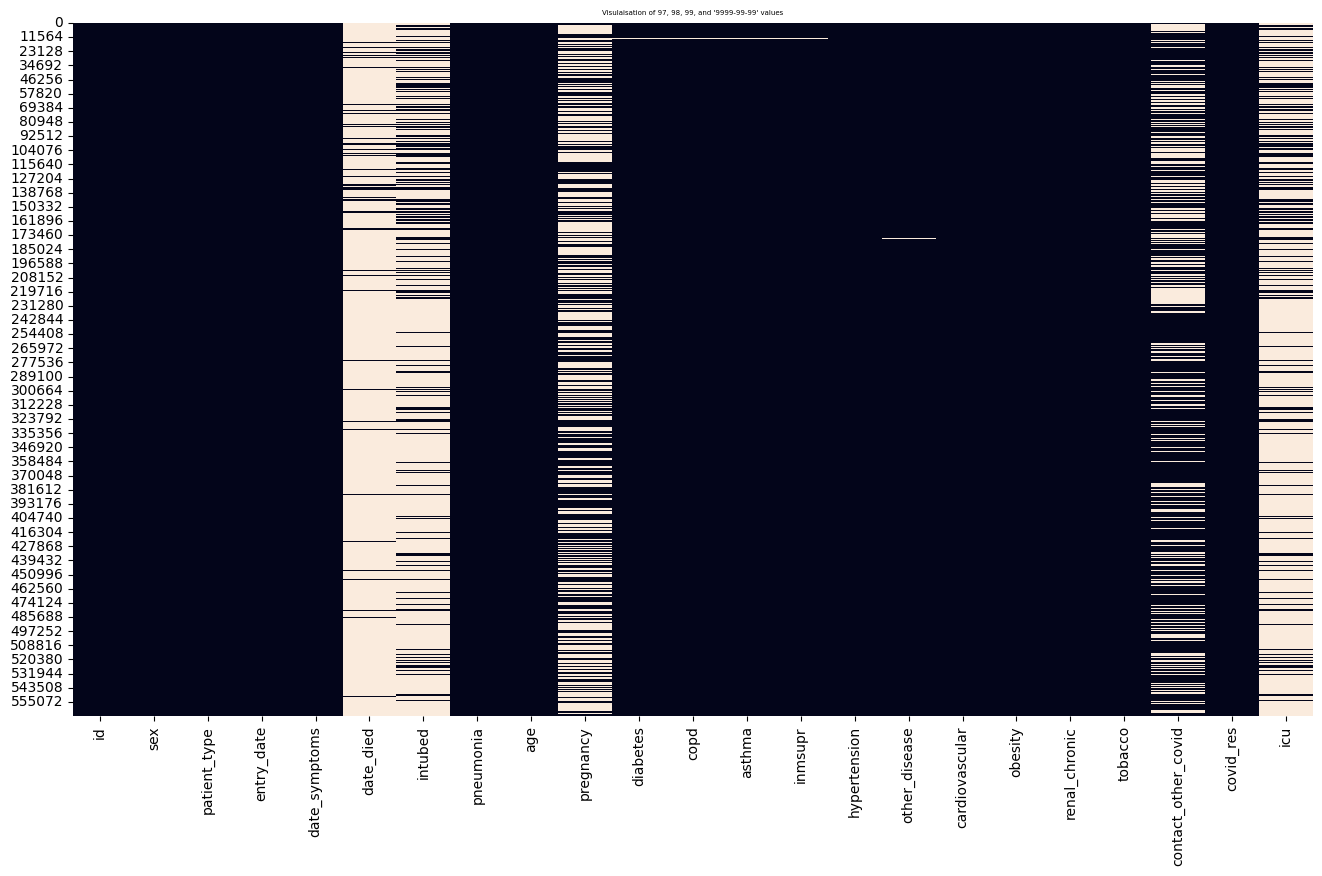

In [12]:
plt.figure(figsize = (16, 9))
sns.heatmap(df.isin([97, 98, 99, '9999-99-99']), cbar = False)
plt.title('Visulaisation of 97, 98, 99', size=5)
plt.draw()

In [4]:
death = pd.DataFrame(df['date_died'])
age = pd.DataFrame(df['age'])
death.rename({'date_died':'Deceased'}, axis=1, inplace=True)
death.where(death == '9999-99-99', 1, inplace=True)

In [ ]:
death.where(death != '9999-99-99', 0, inplace=True)
death = death.astype('int64')

<Axes: xlabel='age', ylabel='Deceased'>

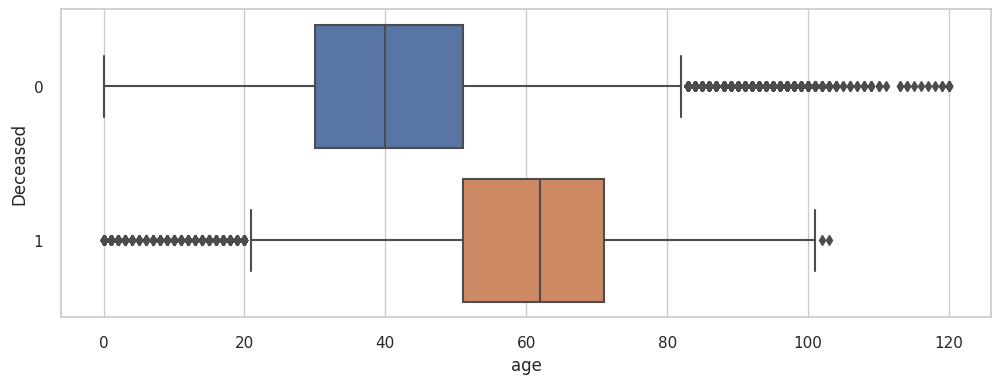

In [ ]:
f = plt.figure(figsize=(12,4))
sns.boxplot(x='age', y='Deceased', data=pd.concat([age,death], axis=1), orient = 'h')

In [ ]:
df=df.drop(columns=['id','entry_date','date_symptoms','date_died'],axis=1)
df['icu'].value_counts()

97    444689
2     111676
1      10112
99       125
Name: icu, dtype: int64

In [ ]:
df['icu'].value_counts()







97    444689
2     111676
1      10112
99       125
Name: icu, dtype: int64

In [ ]:
df.isnull().sum()

id                     0
sex                    0
patient_type           0
entry_date             0
date_symptoms          0
date_died              0
intubed                0
pneumonia              0
age                    0
pregnancy              0
diabetes               0
copd                   0
asthma                 0
inmsupr                0
hypertension           0
other_disease          0
cardiovascular         0
obesity                0
renal_chronic          0
tobacco                0
contact_other_covid    0
covid_res              0
icu                    0
dtype: int64

In [ ]:
df.head()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,2,1,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97
1,2,1,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97
2,1,2,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2
3,2,2,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2
4,1,2,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2


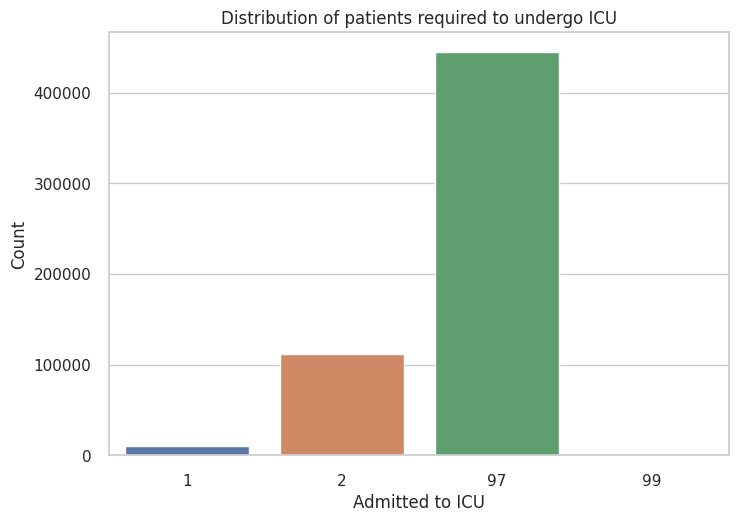

In [ ]:
#Visualizing unknown values
import matplotlib.pyplot as plt
sns.countplot(x='icu',data=df)
plt.title('Distribution of patients required to undergo ICU')
plt.xlabel('Admitted to ICU')
plt.ylabel('Count')
# plt.xticks([1,2,97,99],['No','Yes','No data','no data'])
plt.show()

In [ ]:
# df=df.dropna()
#taking only rows where the target variable has value of 1,2 
df3 = df[df['icu'].isin([1,2])]
df3.head()



,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
2,1,2,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2
3,2,2,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2
4,1,2,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2
5,2,2,2,1,47,97,1,2,2,2,2,2,2,2,2,2,99,1,1
6,2,2,2,2,63,97,2,2,2,2,1,2,2,2,2,2,99,1,2


In [ ]:
#Replacing nan values for 97,98,99
df4=df3.replace({97:np.nan,98:np.nan,99:np.nan})
df4.isnull().sum()

sex                        0
patient_type               0
intubed                    0
pneumonia                  0
age                      107
pregnancy              73165
diabetes                 669
copd                     584
asthma                   585
inmsupr                  678
hypertension             609
other_disease           1040
cardiovascular           646
obesity                  634
renal_chronic            609
tobacco                  639
contact_other_covid    62090
covid_res                  0
icu                        0
dtype: int64

In [ ]:
#filling 3 for an unknown values
df_clean = df4.fillna("3")

<Axes: xlabel='icu', ylabel='count'>

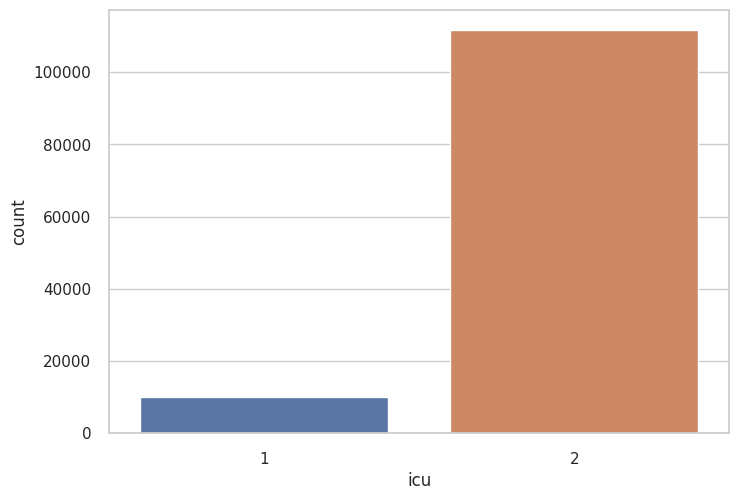

In [ ]:

sns.countplot(x='icu',data=df_clean)


In [ ]:
df_clean['icu'].value_counts()

2    111676
1     10112
Name: icu, dtype: int64

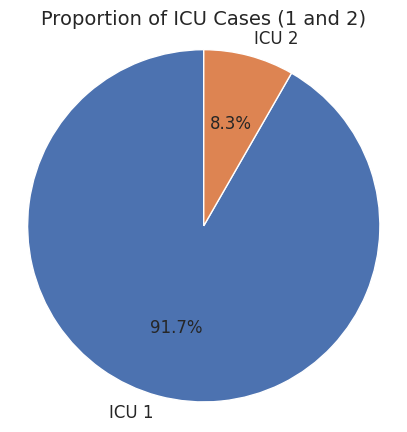

In [ ]:
icu_counts = df_clean['icu'].value_counts()
icu_proportions = icu_counts / icu_counts.sum()

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(icu_proportions, labels=['ICU 1', 'ICU 2'], autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})

# Set the title
plt.title('Proportion of ICU Cases (1 and 2)', fontsize=14)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()

In [ ]:
#balancing the number of 1 and 2 in target variables.
df1=df_clean[df_clean['icu']==2][1:10000]
df2=df_clean[df_clean['icu']==1][1:10000]
frames=[df1,df2]
df_new=pd.concat(frames)
df_new_s=df_new.sample(frac=1)
df_new_s['icu'].value_counts()

2    9999
1    9999
Name: icu, dtype: int64

In [ ]:
#removing those features which has 0 variance
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(df_new_s)

VarianceThreshold(threshold=0)

In [ ]:
var_thres.get_support()


array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [ ]:
constant_columns = [column for column in df1.columns
                    if column not in df1.columns[var_thres.get_support()]]

In [ ]:
constant_columns

['patient_type']

In [ ]:
df_new_s['patient_type'].value_counts()

2    19998
Name: patient_type, dtype: int64

In [ ]:
df_new_s.drop(columns='patient_type',inplace=True)# dropping patient type because it has no variance
df_new_s.head()

,sex,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
5863,1,2,2,89.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1,2
547186,2,2,2,63.0,3,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3,1
14522,2,2,1,63.0,3,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,3,1,2
2366,2,2,1,70.0,3,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,1,2
174426,1,1,2,64.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1,1


In [ ]:
import pandas as pd

# Sample data
# data = {'sex': [1, 2, 2, 2, 2], 'age': [28, 82, 65, 42, 44]}
# df_new_s = pd.DataFrame(data)

# Define a function to convert age to category
def age_to_category(age):
    if int(age) < 12:
        return 1
    elif 12 <= int(age) < 18:
        return 2
    elif 18 <= int(age) < 40:
        return 3
    elif 40 <= int(age) < 50:
        return 4
    else:
        return 5

# Apply the function to the age column and create a new column 'age_category'
df_new_s['age_category'] = df_new_s['age'].apply(age_to_category)

# Display the dataframe
print(df_new_s)



        sex  intubed  pneumonia   age pregnancy diabetes copd asthma inmsupr  \
5863      1        2          2  89.0       2.0      1.0  2.0    2.0     2.0   
547186    2        2          2  63.0         3      2.0  2.0    2.0     2.0   
14522     2        2          1  63.0         3      1.0  2.0    2.0     2.0   
2366      2        2          1  70.0         3      2.0  2.0    2.0     2.0   
174426    1        1          2  64.0       2.0      2.0  2.0    2.0     2.0   
...     ...      ...        ...   ...       ...      ...  ...    ...     ...   
1152      2        2          2  43.0         3      2.0  2.0    2.0     2.0   
178734    1        1          1  69.0       2.0      2.0  2.0    2.0     2.0   
24825     1        2          1  56.0       2.0      2.0  2.0    2.0     2.0   
429604    1        2          1   8.0       2.0      2.0  2.0    2.0     2.0   
299607    2        2          1  73.0         3      1.0  2.0    2.0     2.0   

       hypertension other_disease cardi

In [ ]:
df_new_s.drop(columns='age',inplace=True)


In [ ]:
# df_new_s.head()
df_new.describe()

,sex,patient_type,intubed,pneumonia,covid_res,icu
count,19998.000000,19998.0,19998.000000,19998.000000,19998.000000,19998.000000
mean,1.633063,2.0,1.722822,1.263276,1.258476,1.500000
std,0.481981,0.0,0.447616,0.440422,0.539250,0.500013
min,1.000000,2.0,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.0,1.000000,1.000000,1.000000,1.000000
50%,2.000000,2.0,2.000000,1.000000,1.000000,1.500000
75%,2.000000,2.0,2.000000,2.000000,1.000000,2.000000
max,2.000000,2.0,2.000000,2.000000,3.000000,2.000000


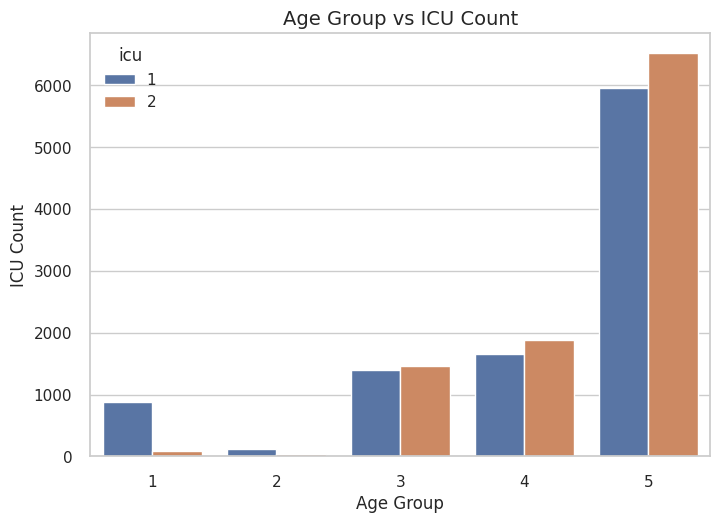

In [ ]:
sns.set(style="whitegrid")
ax = sns.countplot(x="age_category", hue="icu", data=df_new_s)

# Set x-axis and y-axis labels
ax.set_xlabel('Age Group', fontsize=12)
ax.set_ylabel('ICU Count', fontsize=12)

# Set the title
ax.set_title('Age Group vs ICU Count', fontsize=14)

# Show the plot
plt.show()

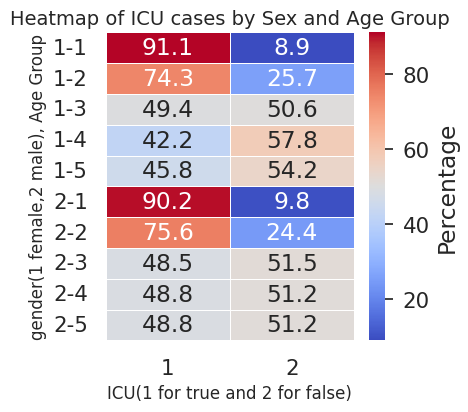

In [ ]:
cross_table = pd.crosstab([df_new_s['sex'], df_new_s['age_category']], df_new_s['icu'])

# Normalize the cross table to show percentages
cross_table_norm = cross_table.div(cross_table.sum(axis=1), axis=0) * 100

# Create a heatmap
plt.figure(figsize=(4,4))
sns.heatmap(cross_table_norm, annot=True, cmap='coolwarm', fmt='.1f', linewidths=0.5, cbar_kws={'label': 'Percentage'})

# Set x-axis and y-axis labels
plt.xlabel('ICU(1 for true and 2 for false)', fontsize=12)
plt.ylabel('gender(1 female,2 male), Age Group', fontsize=12)

# Set the title
plt.title('Heatmap of ICU cases by Sex and Age Group', fontsize=14)

# Show the plot
plt.show()

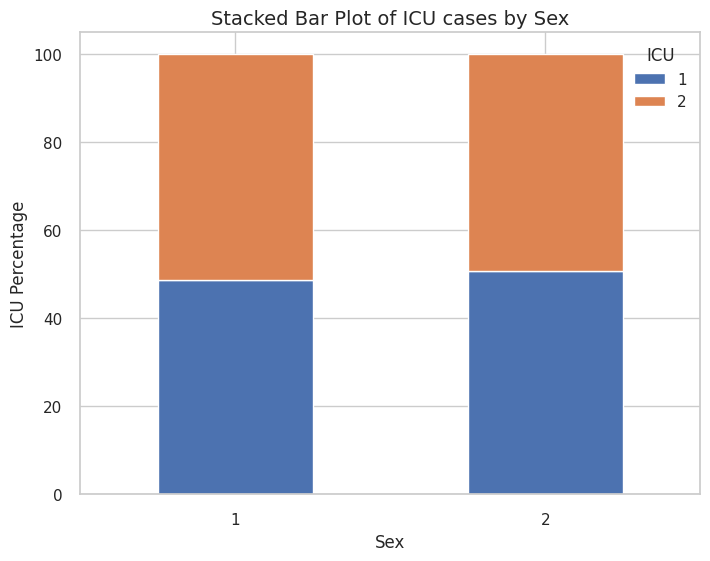

In [ ]:
cross_table = pd.crosstab(df_new_s['sex'], df_new_s['icu'])

# Normalize the cross table to show percentages
cross_table_norm = cross_table.div(cross_table.sum(axis=1), axis=0) * 100

# Create a stacked bar plot
ax = cross_table_norm.plot(kind='bar', stacked=True, figsize=(8, 6))

# Set x-axis and y-axis labels
ax.set_xlabel('Sex', fontsize=12)
ax.set_ylabel('ICU Percentage', fontsize=12)

# Set the title
ax.set_title('Stacked Bar Plot of ICU cases by Sex', fontsize=14)

# Set the x-axis ticks and legend
ax.set_xticklabels(['1', '2'], rotation=0)
ax.legend(title='ICU', loc='upper right')

# Show the plot
plt.show()

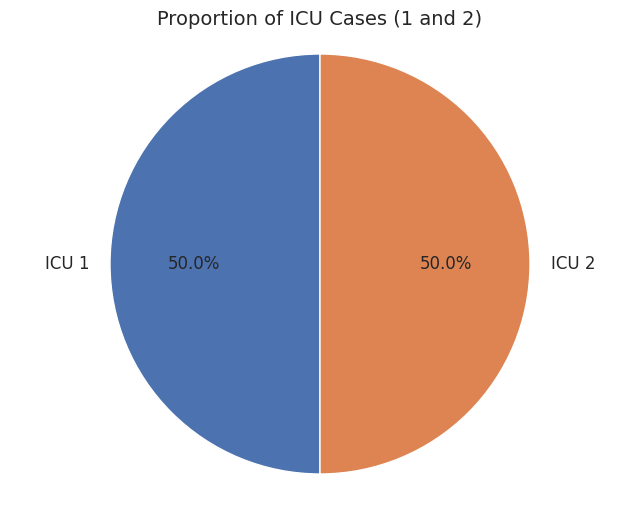

In [ ]:
# Calculate the proportions of ICU cases (1 or 2)
icu_counts = df_new_s['icu'].value_counts()
icu_proportions = icu_counts / icu_counts.sum()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(icu_proportions, labels=['ICU 1', 'ICU 2'], autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})

# Set the title
plt.title('Proportion of ICU Cases (1 and 2)', fontsize=14)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()
# This code snippet creates a pie chart that displays the proportion of ICU cases (1 or 2) in the entire dataset. The pie chart has two slices, one for each ICU case type, and their percentages are shown on the chart.







<Axes: >

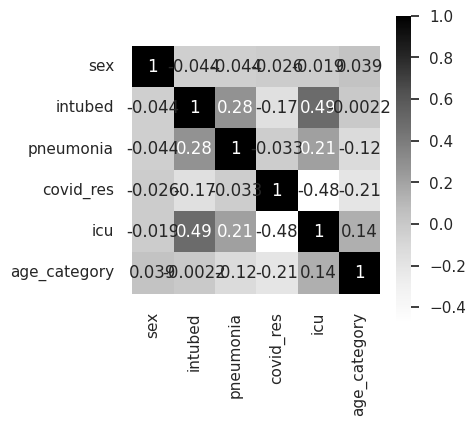

In [ ]:
corr = df_new_s.corr()
cmap = sns.color_palette("Greys", as_cmap=True)
plt.figure(figsize=(4, 4))
sns.heatmap(corr, mask=None, cmap=cmap, square=True, annot=True)


In [ ]:
# df_new_s.drop(columns='age',inplace=True)

In [ ]:
#Seperating the dataset into dependent and independent variables
X=df_new_s.iloc[:,:-1]
y=df_new_s.iloc[:,-1]
X.shape,y.shape

((19998, 17), (19998,))

In [ ]:
X=df_new_s.drop(columns='icu')
y=df_new_s['icu']
X.head()

,sex,intubed,pneumonia,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,age_category
5863,1,2,2,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1,5
547186,2,2,2,3,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3,5
14522,2,2,1,3,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,3,1,5
2366,2,2,1,3,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,1,5
174426,1,1,2,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1,5


In [ ]:
df_new_s.shape

(19998, 18)

In [ ]:
#2 Feature selection

In [ ]:
# 1.Using chisquare 

In [ ]:
from sklearn import datasets
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [ ]:

test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)
fit.scores_


array([1.05934227e+00, 5.54034801e+02, 1.39458061e+02, 6.58419610e-01,
       6.67965431e-01, 5.85068563e-02, 1.45058930e-02, 3.89838243e-01,
       2.81415903e+00, 3.55712242e-01, 5.90442116e-01, 9.65580477e-01,
       5.88235294e-02, 4.80896772e-02, 3.16618256e+02, 1.06165061e+03,
       1.06090625e+02])

In [ ]:
from sklearn.model_selection import train_test_split
X_new=test.fit_transform(X, y)
# X_new.head()

In [ ]:
#Using mutual_info_gain

In [ ]:
from sklearn.feature_selection import mutual_info_classif
# feature selection
def select_features(X_train, y_train):
	fs = SelectKBest(score_func=mutual_info_classif, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	# X_test_fs = fs.transform(X_test)
	return X_train_fs, fs

Feature 0: 0.000000
Feature 1: 0.138574
Feature 2: 0.031685
Feature 3: 0.004627
Feature 4: 0.006207
Feature 5: 0.001638
Feature 6: 0.000000
Feature 7: 0.002175
Feature 8: 0.009326
Feature 9: 0.000575
Feature 10: 0.005625
Feature 11: 0.005329
Feature 12: 0.004162
Feature 13: 0.004619
Feature 14: 0.052109
Feature 15: 0.170268
Feature 16: 0.019538


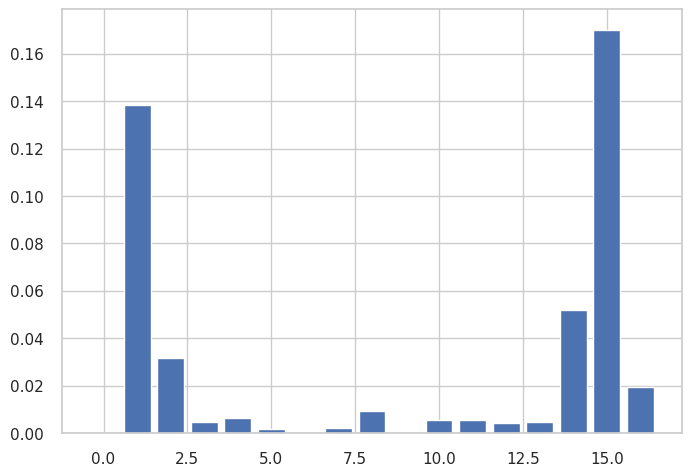

In [ ]:
#plotting F1 score
from matplotlib import pyplot
X, fs =select_features(X, y)
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [ ]:
threshold = 0.01
selected_features = [i for i in range(len(fs.scores_)) if fs.scores_[i] >= threshold]
X_new = X[:, selected_features]
X_new

array([[2, 2, 2.0, 1, 5],
       [2, 2, 1.0, 3, 5],
       [2, 1, '3', 1, 5],
       ...,
       [2, 1, 2.0, 1, 5],
       [2, 1, '3', 2, 1],
       [2, 1, 1.0, 2, 5]], dtype=object)

In [ ]:
#model creation

In [ ]:
# 1.Kmeans clustering

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def Knc(X_train,y_train,X_test,y_test,n):
    neigh = KNeighborsClassifier(n_neighbors=n)
    neighb=neigh.fit(X_train,y_train)
    y_pred=neighb.predict(X_test)
    print("Accuracy is:",accuracy_score(y_test,y_pred))
    a=accuracy_score(y_test,y_pred)
    return y_pred,a

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

Text(0, 0.5, 'Inertia')

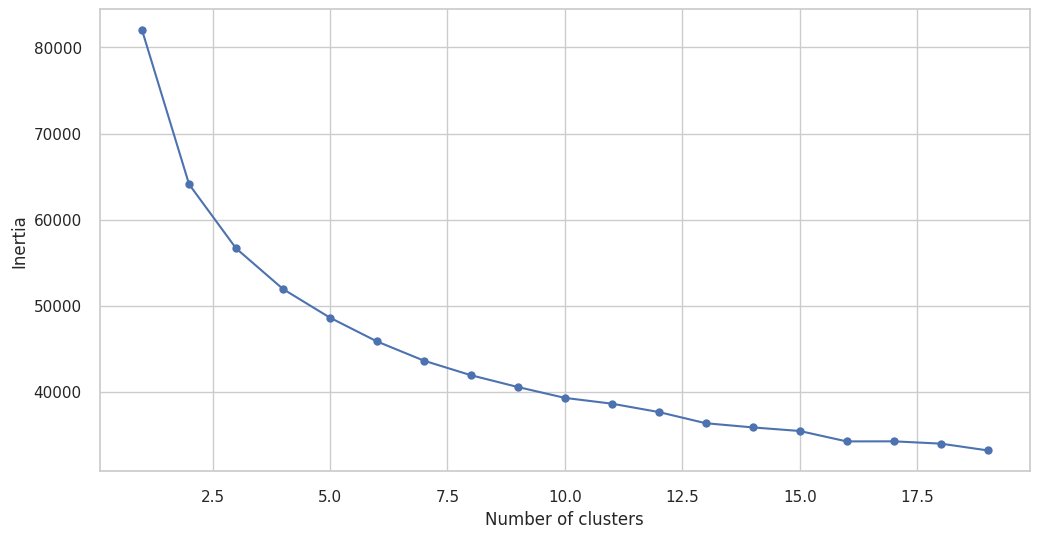

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

SSE = []
for cluster in range(1,20):
    kmeans = KMeans( n_clusters = cluster, init='k-means++')
    kmeans.fit(df_new_s)
    SSE.append(kmeans.inertia_)


# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')


In [ ]:
# model = KMeans(init='k-means++')
# visualizer = KElbowVisualizer(
#     model, k=(4,25), metric='silhouette', timings=False
# )

# visualizer.fit(df_new_s)        # Fit the data to the visualizer
# visualizer.show()


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

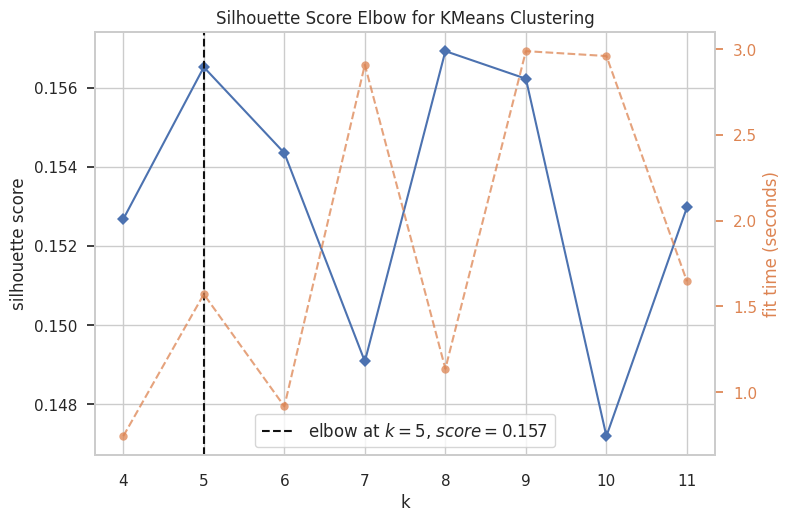

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12), metric='silhouette')

visualizer.fit(df_new_s)        # Fit the data to the visualizer
visualizer.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

Text(0, 0.5, 'Inertia')

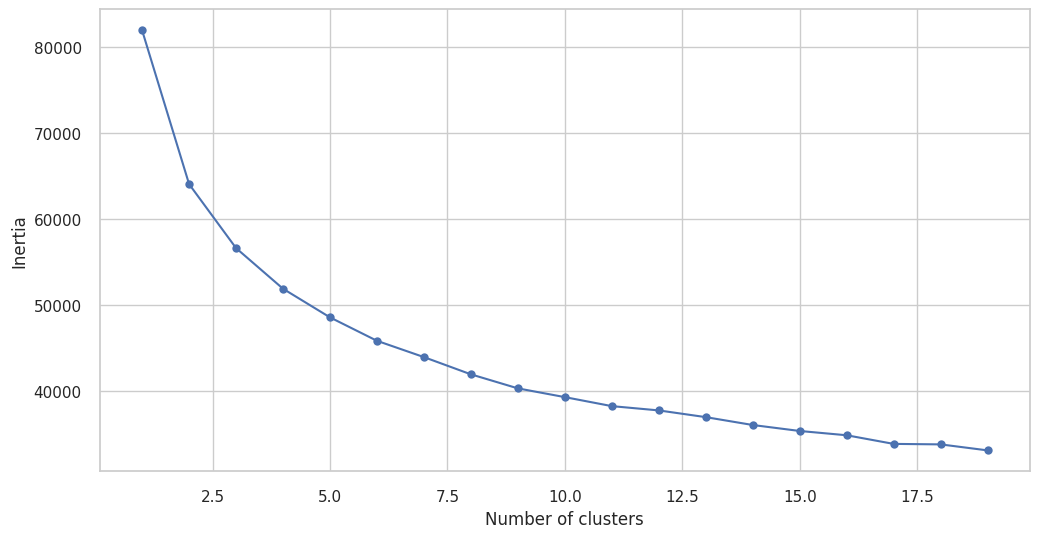

In [ ]:
SSE1 = []
for cluster in range(1,20):
    kmeans = KMeans( n_clusters = cluster)
    kmeans.fit(df_new_s)
    SSE1.append(kmeans.inertia_)


frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE1})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [ ]:
SSE1

[81984.16671667102,
 64103.00420846787,
 56663.532173220476,
 51936.95577477255,
 48608.051281654414,
 45882.567286264035,
 43987.07406981399,
 41983.89188519826,
 40351.57101746452,
 39333.26912825604,
 38286.99279228634,
 37788.07255782902,
 37006.97354899523,
 36091.6589225146,
 35396.70499329835,
 34899.05769646837,
 33895.20737118152,
 33837.61843637694,
 33139.68114632173]

In [ ]:
# Dividing the data into 4 clusters

kmeans = KMeans(init='k-means++',n_clusters = 4)
kmeans.fit(df_new)
pred1 = kmeans.predict(df_new)
pred1

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 0, 0, ..., 2, 2, 0], dtype=int32)

In [ ]:
frame1 = pd.DataFrame(df_new)
frame1['cluster'] = pred1
frame1['cluster'].value_counts()

0    8095
1    5729
2    4801
3    1373
Name: cluster, dtype: int64

In [ ]:
#Dividing each cluster of data and making the new dataaframe
cluster1_f=frame1[frame1['cluster']==0]
cluster2_f=frame1[frame1['cluster']==1]
cluster3_f=frame1[frame1['cluster']==2]
cluster4_f=frame1[frame1['cluster']==3]

In [ ]:
cluster1=cluster1_f.drop(columns='cluster')
cluster2=cluster2_f.drop(columns='cluster')
cluster3=cluster3_f.drop(columns='cluster')
cluster4=cluster4_f.drop(columns='cluster')

In [ ]:
X_c1 = cluster1.drop(columns='icu')
y_c1=cluster1['icu']

X_c2 = cluster2.drop(columns='icu')
y_c2=cluster2['icu']

X_c3 = cluster3.drop(columns='icu')
y_c3=cluster3['icu']

X_c4 = cluster4.drop(columns='icu')
y_c4=cluster4['icu']

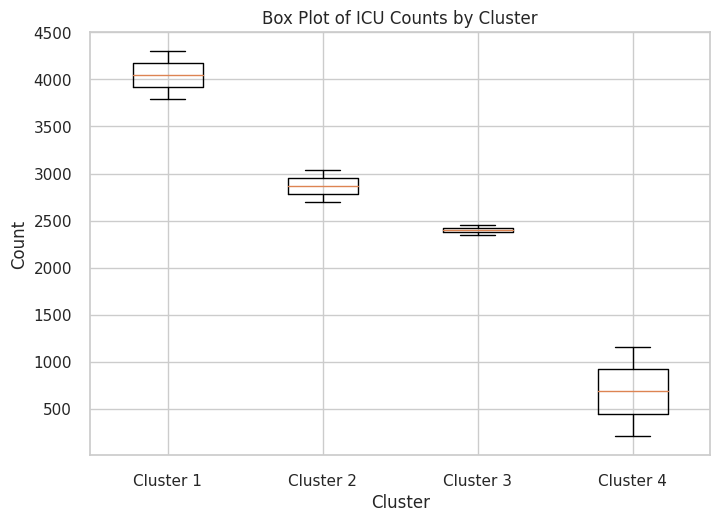

In [ ]:
i=0
j=0
c_1_1=(cluster1_f['icu']==1).sum()
c_1_2=(cluster1_f['icu']==2).sum()

c_2_1=(cluster2_f['icu']==1).sum()
c_2_2=(cluster2_f['icu']==2).sum()

c_3_1=(cluster3_f['icu']==1).sum()
c_3_2=(cluster3_f['icu']==2).sum()

c_4_1=(cluster4_f['icu']==1).sum()
c_4_2=(cluster4_f['icu']==2).sum()


import matplotlib.pyplot as plt

# Example cluster counts
c_1 = [c_1_1, c_1_2]
c_2 = [c_2_1, c_2_2]
c_3 = [c_3_1, c_3_2]
c_4 = [c_4_1, c_4_2]

# Create list of cluster values and labels
values = [c_1, c_2, c_3, c_4]
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

# Create box plot
fig, ax = plt.subplots()
ax.boxplot(values, labels=labels)
ax.set_xlabel('Cluster')
ax.set_ylabel('Count')
ax.set_title('Box Plot of ICU Counts by Cluster')
plt.show()



  


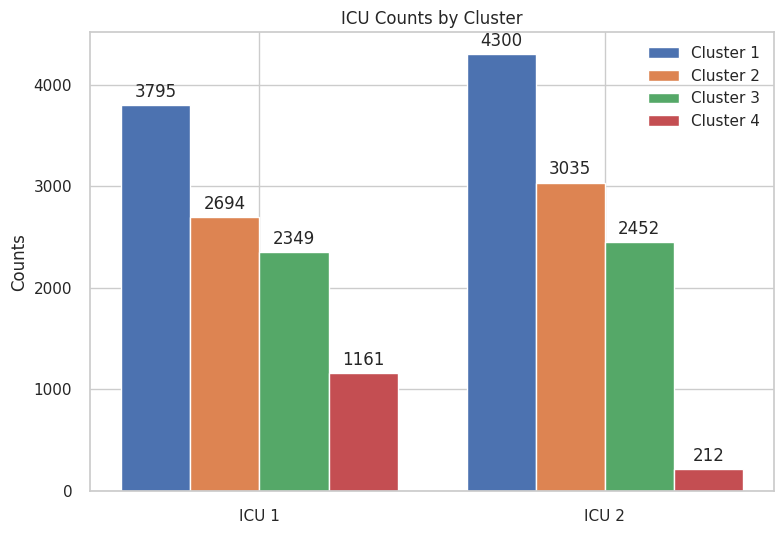

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data
c_1 = [(cluster1_f['icu']==1).sum(), (cluster1_f['icu']==2).sum()]
c_2 = [(cluster2_f['icu']==1).sum(), (cluster2_f['icu']==2).sum()]
c_3 = [(cluster3_f['icu']==1).sum(), (cluster3_f['icu']==2).sum()]
c_4 = [(cluster4_f['icu']==1).sum(), (cluster4_f['icu']==2).sum()]

# Set up the bar chart
labels = ['ICU 1', 'ICU 2']
x = np.arange(len(labels))  # The label locations
width = 0.2  # The width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - 3*width/2, c_1, width, label='Cluster 1')
rects2 = ax.bar(x - width/2, c_2, width, label='Cluster 2')
rects3 = ax.bar(x + width/2, c_3, width, label='Cluster 3')
rects4 = ax.bar(x + 3*width/2, c_4, width, label='Cluster 4')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counts')
ax.set_title('ICU Counts by Cluster')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Function to attach a text label above each bar in rects
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

plt.show()


In [ ]:
#splitting the dataset
from sklearn.model_selection import train_test_split
X_train_c1,X_test_c1,y_train_c1,y_test_c1=train_test_split(X_c1,y_c1,test_size=0.2,random_state=0,stratify=y_c1)
X_train_c2,X_test_c2,y_train_c2,y_test_c2=train_test_split(X_c2,y_c2,test_size=0.2,random_state=0,stratify=y_c2)
X_train_c3,X_test_c3,y_train_c3,y_test_c3=train_test_split(X_c3,y_c3,test_size=0.2,random_state=0,stratify=y_c3)
X_train_c4,X_test_c4,y_train_c4,y_test_c4=train_test_split(X_c4,y_c4,test_size=0.2,random_state=0,stratify=y_c4)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)

In [ ]:
# y_k_p=Knc(X_train,y_train,X_test,y_test,41)


In [ ]:
# y_k_p=Knc(X_train_c1,y_train_c1,X_test_c1,y_test_c1,17)

In [ ]:
# y_k_p=Knc(X_train_c2,y_train_c2,X_test_c2,y_test_c2,17)

In [ ]:
# y_k_1=Knc1(X_train,y_train,X_test,y_test,2)

In [ ]:
#preprocessing the dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_c11=scaler.fit_transform(X_train_c1)
X_test_c11=scaler.transform(X_test_c1)
X_train_c11.shape,y_train_c1.shape

((6476, 18), (6476,))

In [ ]:
#LOgistic regression in 4 cluster of data frame
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
def LR(X_train,y_train,X_test,y_test):
    clf = LogisticRegression(random_state=0,solver='lbfgs', max_iter=100).fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    print("Accuracy is:",accuracy_score(y_test,y_pred))
    a=confusion_matrix(y_test,y_pred)
    return a

In [ ]:
# y_k_p=Knc(X_train,y_train,X_test,y_test,3)
from sklearn import preprocessing
# y_k_p=LR(X_train_c11,y_train_c1,X_test_c11,y_test_c1)

In [ ]:
y_k_p1=LR(scaler.fit_transform(X_train),y_train,scaler.fit_transform(X_test),y_test)
y_k_p2=LR(X_train_c11,y_train_c1,X_test_c11,y_test_c1)
y_k_p3=LR(scaler.fit_transform(X_train_c2),y_train_c2,scaler.fit_transform(X_test_c2),y_test_c2)
y_k_p4=LR(scaler.fit_transform(X_train_c3),y_train_c3,scaler.fit_transform(X_test_c3),y_test_c3)
y_k_p5=LR(scaler.fit_transform(X_train_c4),y_train_c4,scaler.fit_transform(X_test_c4),y_test_c4)
#The maximum accuracy is on 3rd cluster which is 89 percent and lowest is 74 percent.The 74 percent is a little bit
# low becausethe data on cluster has mixed target values

Accuracy is: 0.83825
Accuracy is: 0.840024706609018
Accuracy is: 0.8333333333333334
Accuracy is: 0.8407908428720083
Accuracy is: 0.8945454545454545


In [ ]:

 
import seaborn
import matplotlib.pyplot as plt
 
 
def plot_confusion_matrix(data, labels, output_filename):
    seaborn.set(color_codes=True)
    plt.figure(1, figsize=(9, 6))
 
    plt.title("Confusion Matrix")
 
    seaborn.set(font_scale=1.4)
    ax = seaborn.heatmap(data, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Scale'})
 
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
 
    ax.set(ylabel="True Label", xlabel="Predicted Label")
 
    plt.savefig(output_filename, bbox_inches='tight', dpi=300)
    plt.close()

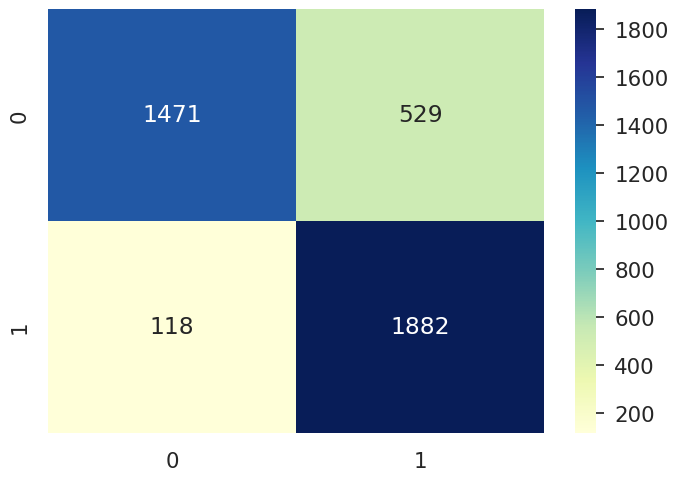

In [ ]:
from sklearn.metrics import confusion_matrix
y_k_p1
labels = [1,2]
data=y_k_p1
# create confusion matrix
plot_confusion_matrix(data, labels, "confusion_matrix.png")
ax = seaborn.heatmap(data, annot=True, cmap="YlGnBu",fmt='.4g')

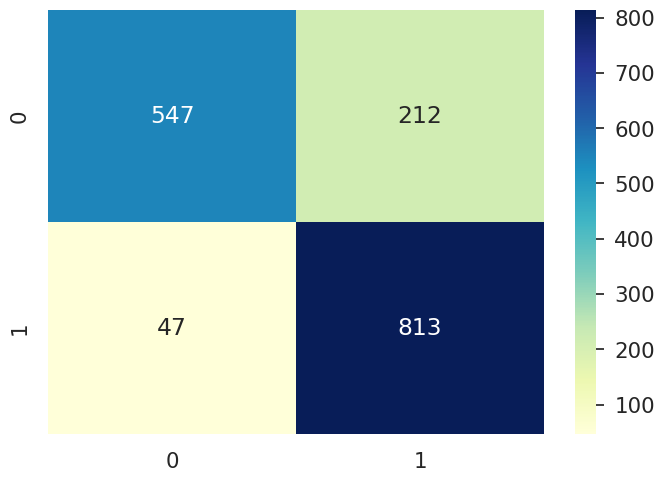

In [ ]:
data=y_k_p2
# create confusion matrix
plot_confusion_matrix(data, labels, "confusion_matrix.png")
ax = seaborn.heatmap(data, annot=True, cmap="YlGnBu",fmt='.4g')

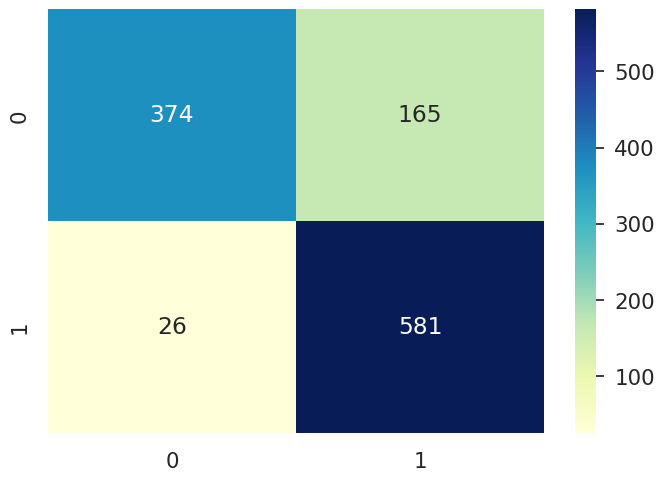

In [ ]:
data=y_k_p3
# create confusion matrix
plot_confusion_matrix(data, labels, "confusion_matrix.png")
ax = seaborn.heatmap(data, annot=True, cmap="YlGnBu",fmt='.4g')

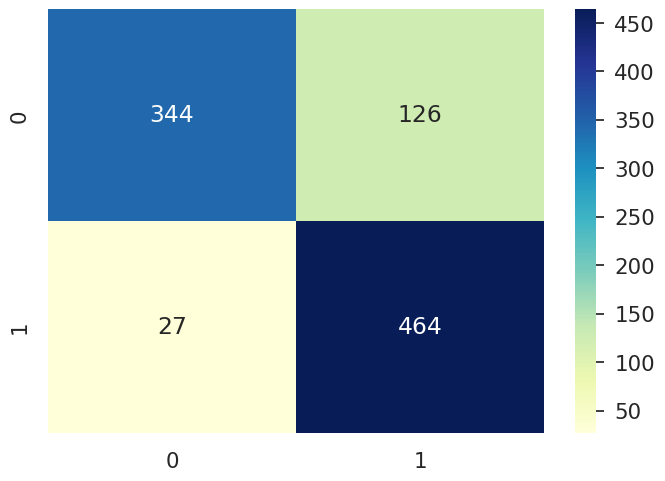

In [ ]:
data=y_k_p4
# create confusion matrix
plot_confusion_matrix(data, labels, "confusion_matrix.png")
ax = seaborn.heatmap(data, annot=True, cmap="YlGnBu",fmt='.4g')

In [ ]:
#Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
rfc=clf.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
accuracy_score(y_test, y_pred)

0.82825

In [ ]:
y_k_p=Knc(X_train,y_train,X_test,y_test,3)

Accuracy is: 0.7985


In [ ]:
y_k_p=Knc(X_train,y_train,X_test,y_test,4)

Accuracy is: 0.7835


In [ ]:
y_k_p=Knc(X_train,y_train,X_test,y_test,5)

Accuracy is: 0.81575


Accuracy is: 0.733
Accuracy is: 0.72425
Accuracy is: 0.7985
Accuracy is: 0.7835
Accuracy is: 0.81575
Accuracy is: 0.80425
Accuracy is: 0.824
Accuracy is: 0.812
Accuracy is: 0.8235
Accuracy is: 0.81075
Accuracy is: 0.81975
Accuracy is: 0.81575
Accuracy is: 0.823
Accuracy is: 0.81025
Accuracy is: 0.824
Accuracy is: 0.822
Accuracy is: 0.8235
Accuracy is: 0.82325
Accuracy is: 0.8255
Accuracy is: 0.823
Accuracy is: 0.8275
Accuracy is: 0.825
Accuracy is: 0.827
Accuracy is: 0.8265
Accuracy is: 0.82475
Accuracy is: 0.826
Accuracy is: 0.82525
Accuracy is: 0.8255
Accuracy is: 0.825
Accuracy is: 0.82625
Accuracy is: 0.82575
Accuracy is: 0.82675
Accuracy is: 0.82775
Accuracy is: 0.8265
Accuracy is: 0.827
Accuracy is: 0.82675
Accuracy is: 0.82575
Accuracy is: 0.8275
Accuracy is: 0.8265
Accuracy is: 0.82625
Accuracy is: 0.825
Accuracy is: 0.82525
Accuracy is: 0.827
Accuracy is: 0.82575
Accuracy is: 0.82725
Accuracy is: 0.827
Accuracy is: 0.827
Accuracy is: 0.8265
Accuracy is: 0.8255


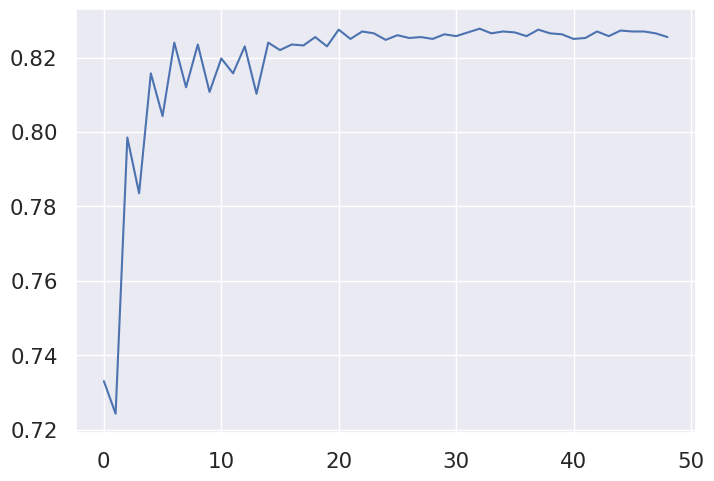

In [ ]:
from matplotlib import pyplot as plt
ac=[]
for i in range(1,50):
  y_k_p,a=Knc(X_train,y_train,X_test,y_test,i)
  ac.append(a)
plt.plot(ac)


In [ ]:
y=df_new_s.icu
data=['sex', 'intubed', 'pneumonia', 'pregnancy',
       'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
       'tobacco', 'contact_other_covid', 'covid_res']
df_d=pd.get_dummies(df_new_s, columns = data)
df_d=df_d.drop(columns=['icu'],axis=1)
df_d.head()




,age_category,sex_1,sex_2,intubed_1,intubed_2,pneumonia_1,pneumonia_2,pregnancy_1.0,pregnancy_2.0,pregnancy_3,...,renal_chronic_3,tobacco_1.0,tobacco_2.0,tobacco_3,contact_other_covid_1.0,contact_other_covid_2.0,contact_other_covid_3,covid_res_1,covid_res_2,covid_res_3
5863,5,1,0,0,1,0,1,0,1,0,...,0,0,1,0,0,1,0,1,0,0
547186,5,0,1,0,1,0,1,0,0,1,...,0,0,1,0,1,0,0,0,0,1
14522,5,0,1,0,1,1,0,0,0,1,...,0,0,1,0,0,0,1,1,0,0
2366,5,0,1,0,1,1,0,0,0,1,...,0,0,1,0,0,0,1,1,0,0
174426,5,1,0,1,0,0,1,0,1,0,...,0,0,1,0,0,1,0,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test=train_test_split(df_new_s,y,test_size=0.2,random_state=0,stratify=y)

In [ ]:
X_train.shape

(15998, 17)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
X_train


array([[1. , 1. , 1. , ..., 1. , 0.5, 1. ],
       [1. , 0. , 0. , ..., 0.5, 0.5, 0. ],
       [0. , 0. , 0. , ..., 1. , 1. , 1. ],
       ...,
       [1. , 1. , 1. , ..., 0.5, 0. , 0. ],
       [0. , 1. , 0. , ..., 0.5, 0.5, 0. ],
       [1. , 1. , 0. , ..., 0.5, 0. , 1. ]])

In [ ]:
y_pred=LR(X_train,y_train,X_test,y_test)
y_pred

Accuracy is: 0.83875


array([[1471,  529],
       [ 116, 1884]])

In [ ]:
# y_p_k=Knc(X_train,y_train,X_test,y_test,4)

In [ ]:
# from sklearn.metrics import confusion_matrix
# dat=confusion_matrix(y_test.values,y_pred)
# dat_k=confusion_matrix(y_test.values,y_pred)
# # y_test.values
# dat_k



ValueError: ignored

In [ ]:

# labels = [1,2]
# data=dat
# # create confusion matrix
# plot_confusion_matrix(data, labels, "confusion_matrix.png")
# ax = seaborn.heatmap(data, annot=True, cmap="YlGnBu",fmt='.4g')



In [ ]:
# ax = seaborn.heatmap(dat_k, annot=True, cmap="YlGnBu",fmt='.4g')

In [ ]:
# import tensorflow as tf
# from tensorflow.keras import Sequential, Input
# from tensorflow.keras.layers import Dense


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, recall_score

In [ ]:
# from imblearn.over_sampling import SMOTE

# X = df_clean.drop('icu',axis='columns')
# y = df_clean['icu']

# icu_before_oversampling = y.value_counts()
# print('ICU values before oversampling')
# # print(f'0: {icu_before_oversampling[0]}')
# # print(f'1: {icu_before_oversampling[1]}')

# sm = SMOTE(random_state=42)
# X_res, y_res = sm.fit_resample(X, y)

# icu_after_oversampling = y_res.value_counts()
# print('\nICU values after oversampling')
# # print(f'0: {icu_after_oversampling[0]}')
# # print(f'1: {icu_after_oversampling[1]}')
# X_res.shape, y_res.shape

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.30, random_state=0,stratify=y_res)

# print('Lenght of training data:',len(X_train))
# print('Lenght of testing data:',len(X_test))

In [ ]:
# scaler = MinMaxScaler()

# # fit and transfrom
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [ ]:
# model = Sequential()
# model.add(Dense(12, input_dim=18, activation='relu'))

# # hidden layers
# model.add(Dense(40,activation='relu',name="a"))
# # model.add(Dense(40,activation='relu'))

# # output layer
# model.add(Dense(1,activation='sigmoid'))
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.BinaryCrossentropy(),
#               metrics=['accuracy'])

In [ ]:
# model = Sequential()

# # input layer
# model.add(Input(shape=(18,)))

# # hidden layers
# model.add(Dense(40,activation='relu'))
# model.add(Dense(40,activation='relu'))
# model.add(Dense(40,activation='relu'))
# model.add(Dense(80,activation='relu'))

# model.add(Dense(40,activation='relu'))
# model.add(Dense(40,activation='relu'))
# model.add(Dense(40,activation='relu'))

# # output layer
# model.add(Dense(1,activation='sigmoid'))

# model.compile(optimizer='adam',
#               loss=tf.keras.losses.BinaryCrossentropy(),
#               metrics=[tf.keras.metrics.Recall()])

In [ ]:
# history = model.fit(x=X_train,y=y_train.values,validation_data=(X_test,y_test.values),batch_size=256,epochs=300)


In [ ]:
# history = model.fit(x=X_train_c11,y=y_train_c1.values,validation_data=(X_test_c11,y_test_c1.values),batch_size=32,epochs=50)


In [ ]:
X_train_c11.shape,y_train_c1.shape

In [ ]:
# loss = history.history['loss']
# val_loss = history.history['val_loss']

# plt.figure(figsize=(15,5))
# plt.plot(loss,lw=3)
# plt.plot(val_loss,lw=3)
# plt.title('Training Loss per Epoch')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend(['Loss', 'Validation loss'], loc='upper left')
# sns.despine()